In [1]:
import laspy
import numpy as np
import open3d as o3d

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny

from matplotlib import cm

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
data = laspy.read("/home/jf/Downloads/WingDownload/PUNKTSKY_00005_1km_6146_468.laz", laz_backend=laspy.compression.LazBackend.LazrsParallel)
#pdal_data = laspy.read("/home/jf/msc_data/denmark/raw/train/PUNKTSKY_00005_1km_6090_503_hag_delaunay.laz", laz_backend=laspy.compression.LazBackend.LazrsParallel)


4095


In [4]:
point_data = np.stack([test_data.X, data.Y, test_test_data.Z], axis=0).transpose((1, 0))
print(point_data.shape)


geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])

(15554025, 3)


KeyboardInterrupt: 

In [27]:
pdal_data.header
list(pdal_data.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'HeightAboveGround']

In [4]:
meter3_test = pdal_data[pdal_data.HeightAboveGround>3]
meter3_test

<LasData(1.2, point fmt: <PointFormat(3, 4 bytes of extra dims)>, 6597487 points, 3 vlrs)>

In [20]:
point_data = np.stack([meter3_test.X, meter3_test.Y, meter3_test.Z], axis=0).transpose((1, 0))
print(point_data.shape)


geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])


(6597487, 3)


In [22]:
meter3_test.write("meters.las")

In [5]:
data.header
#data.header.point_format
#data.header.point_count
#data.vlrs

<LasHeader(1.4, <PointFormat(7, 19 bytes of extra dims)>)>

In [6]:
list(data.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'synthetic',
 'key_point',
 'withheld',
 'overlap',
 'scanner_channel',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'user_data',
 'scan_angle',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'ClassFlags',
 'Amplitude',
 'Reflectance',
 'Deviation']

In [5]:
print(f"{np.min(data.X)= }")
print(f"{np.max(data.X)= }")
print(f"{np.max(data.X)-np.min(data.X)= }")


np.min(data.X)= 50700000
np.max(data.X)= 50800000
np.max(data.X)-np.min(data.X)= 100000


In [6]:
print(f"{np.min(data.Y)= }")
print(f"{np.max(data.Y)= }")
print(f"{np.max(data.Y)-np.min(data.Y)= }")

np.min(data.Y)= 609000000
np.max(data.Y)= 609100000
np.max(data.Y)-np.min(data.Y)= 100000


In [7]:
print(f"{np.min(data.Z)= }")
print(f"{np.max(data.Z)= }")
print(f"{np.max(data.Z)-np.min(data.Z)= }")
a = np.max(data.Z)-np.min(data.Z)
print(f"{a/100= }")
print(data.Z)

np.min(data.Z)= 455
np.max(data.Z)= 12688
np.max(data.Z)-np.min(data.Z)= 12233
a/100= 122.33
[1815 1818 1822 ... 1616 1617 1620]


In [8]:
point_data = np.stack([data.X, data.Y, data.Z], axis=0).transpose((1, 0))
point_data.shape

(18158337, 3)

In [11]:
# geom = o3d.geometry.PointCloud()
# geom.points = o3d.utility.Vector3dVector(point_data)
# o3d.visualization.draw_geometries([geom])

In [9]:
point_data[:,2] = point_data[:,2]-np.min(data.Z)

In [20]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np.vstack((data.x, data.y, data.z)).transpose())
#pcd.colors = o3d.utility.Vector3dVector(np.vstack((data.red, data.green, data.blue)).transpose())
v_size=round(max(pcd.get_max_bound()-pcd.get_min_bound())*0.005,4)
voxel_grid=o3d.geometry.VoxelGrid.create_from_point_cloud(pcd,voxel_size=v_size)
o3d.visualization.draw_geometries([voxel_grid])

In [18]:
pcd.colors = o3d.utility.Vector3dVector(np.vstack((data.red, data.green, data.blue)).transpose())
np.asarray(pcd.colors)

KeyboardInterrupt: 

In [57]:
data = laspy.read("/home/jf/first_data/PUNKTSKY_00005_1km_6090_522_hag_delaunay.laz", laz_backend=laspy.compression.LazBackend.LazrsParallel)

image = cv2.imread('/home/jf/first_data/PUNKTSKY_00005_1km_6090_522_hag_delaunay_max.tif', cv2.IMREAD_UNCHANGED)
image = np.where(image >= 0, image, 0)
image = image/np.max(image)
#image = mpimg.imread("test_images/ppnt.jpg")
image = (image*255).astype(np.uint8)
print(image.shape)

4095
(12501, 12501)


In [64]:
N = 4000
POINT_DATA_SCALE = (4000+200) * int(np.ceil((max(data.X)-np.min(data.X))/image.shape[0]))
print(POINT_DATA_SCALE)

33600


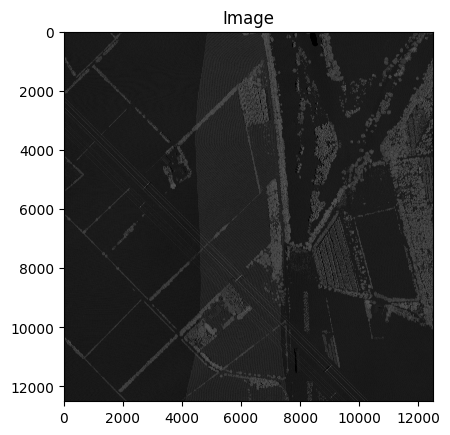

In [59]:
plt.title("Image")
plt.imshow(image, cmap='gray')
plt.show()

In [60]:
point_data = np.stack([data.X, data.Y, data.Z], axis=0).transpose((1, 0))
print(point_data.shape)
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])

(16393140, 3)


In [65]:
test_data = laspy.read("/home/jf/first_data/PUNKTSKY_00005_1km_6090_522_hag_delaunay.laz", laz_backend=laspy.compression.LazBackend.LazrsParallel)

test_data.X = test_data.X -np.min(test_data.X)
test_data.Y = test_data.Y -np.min(test_data.Y)
print(f"{N/image.shape[0] =}")
print(f"{POINT_DATA_SCALE/(np.max(test_data.X)-np.min(test_data.X)) =}")
# print(f"{np.min(data.X)= }")
# print(f"{np.max(data.X)= }")
# print(f"{np.max(data.X)-np.min(data.X)= }")
# print(f"{np.min(data.Y)= }")
# print(f"{np.max(data.Y)= }")
# print(f"{np.max(data.Y)-np.min(data.Y)= }")

test_data.points = test_data.points[test_data.X < POINT_DATA_SCALE]
test_data.points = test_data.points[test_data.Y < POINT_DATA_SCALE]


4095
N/image.shape[0] =0.31997440204783617
POINT_DATA_SCALE/(np.max(test_data.X)-np.min(test_data.X)) =0.336


In [66]:
point_data = np.stack([test_data.X, test_data.Y, test_data.Z], axis=0).transpose((1, 0))
print(point_data.shape)
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])

(1333909, 3)


In [23]:
# 30/45 × 100 = 66.67%.

# So, 30 is 66.67% of 45.


0.31997440204783617

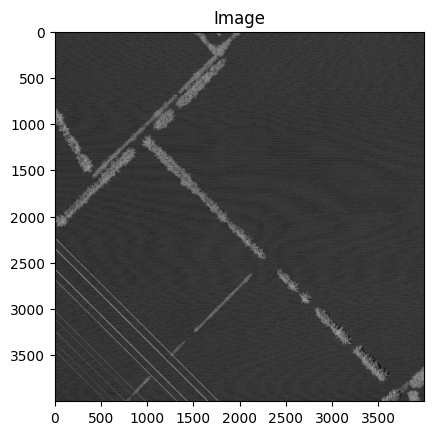

In [30]:
test = image[:N, :N]
plt.title("Image")
plt.imshow(test, cmap='gray')
plt.show()

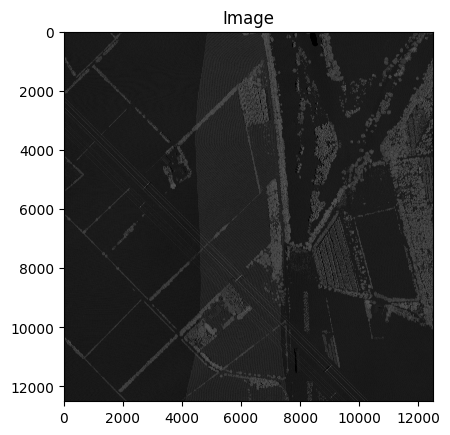

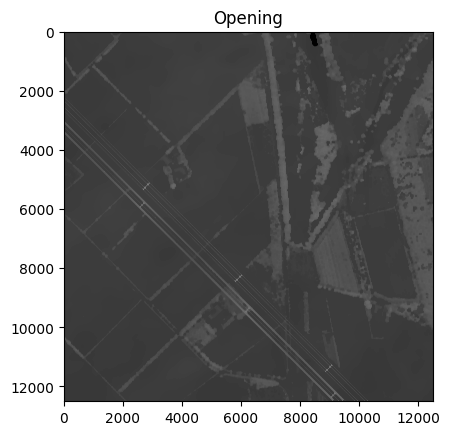

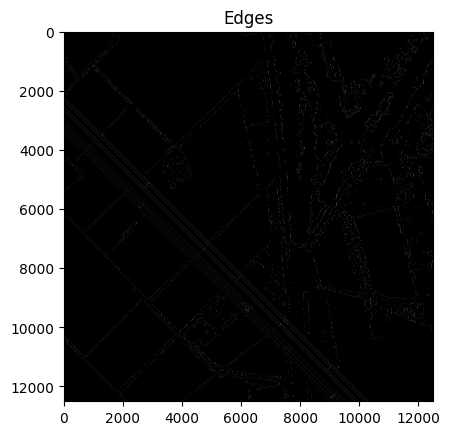

5077


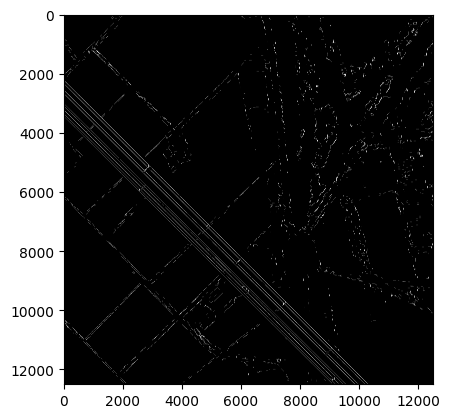

In [9]:

image = cv2.imread('/home/jf/first_data/PUNKTSKY_00005_1km_6090_522_hag_delaunay_max.tif', cv2.IMREAD_UNCHANGED)
image = np.where(image >= 0, image, 0)
image = image/np.max(image)

#image = mpimg.imread("test_images/ppnt.jpg")
image = (image*255).astype(np.uint8)

plt.title("Image")
plt.imshow(image, cmap='gray')
plt.show()


kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.title("Opening")
plt.imshow(closing, cmap='gray')
plt.show()

# Apply edge detection method on the image
#edges = cv2.Canny(image, 50, 200, None, 3)
edges = cv2.Canny(closing, 15, 15)

plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.show()




# Probabilistic Line Transform
# min_line_length, max_line_gap

#dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
#lines: A vector that will store the parameters (r,θ) of the detected lines
#rho : The resolution of the parameter r in pixels. We use 1 pixel.
#theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
#threshold: The minimum number of intersections to "*detect*" a line

#srn For the multi-scale Hough transform, it is a divisor for the distance resolution rho. The coarse accumulator
#distance resolution is rho and the accurate accumulator resolution is rho/srn.
#If both srn=0 and stn=0, the classical Hough transform is used. Otherwise,
#both these parameters should be positive.
# min line length

#stn For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
# max line gap

linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 10, None, 50, 20)
#linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 300, 10)

print(len(linesP))

lines_image = np.zeros_like(image)

# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(lines_image, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3)


plt.imshow(lines_image, cmap='gray')
plt.show()